In [268]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

Поступил звонок от компании-клиента.
Необходима срочная перевозка груза из Таллинна в Санкт-Петербург.
Вес груза неизвестен, но известно, что перевезти предстоит 140 коробок.
В Таллинне в настоящий момент доступен только один автомобиль грузоподъемностью 1,2 тонны.
Ответить в терминах анализа данных (например оценить вероятность или проверить статистическую гипотезу)

In [269]:
df = pd.read_csv('zakazi.csv')
df.head()

,nomer zakaza,ves gruza,day,kol korobok,city otpravki,city dostavki
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург


In [270]:
bx = pd.read_csv('boxes.csv')
bx.head()

,number_box,number_zakaza,ves_box
0,1,1,5.88
1,2,1,5.69
2,3,1,3.69
3,4,1,5.56
4,5,1,3.45


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nomer zakaza   1300 non-null   int64  
 1   ves gruza      1300 non-null   float64
 2   day            1300 non-null   int64  
 3   kol korobok    1300 non-null   int64  
 4   city otpravki  1300 non-null   object 
 5   city dostavki  1300 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 61.1+ KB


In [272]:
df.shape

(1300, 6)

In [273]:
df.isnull().sum()

nomer zakaza     0
ves gruza        0
day              0
kol korobok      0
city otpravki    0
city dostavki    0
dtype: int64

В наборе данных 'Заказы(zakazi.csv)' 6 столбцов и 1300 строк, без нулевых значений.

In [274]:
bx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196132 entries, 0 to 196131
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   number_box     196132 non-null  int64  
 1   number_zakaza  196132 non-null  int64  
 2   ves_box        196132 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.5 MB


In [275]:
bx.shape

(196132, 3)

In [276]:
df.isnull().sum()

nomer zakaza     0
ves gruza        0
day              0
kol korobok      0
city otpravki    0
city dostavki    0
dtype: int64

В наборе данных 'коробки по заказам(boxes.csv)' 3 столбца и 196132 строк. Также нет нулевых значений.

In [317]:
#рассчитаем общее число заказов, суммы веса груза и количества коробок по дням 
df1= df.groupby('day').agg({ 'nomer zakaza': 'count','ves gruza' : 'sum', 'kol korobok' : 'sum'}).rename(columns={'nomer zakaza':'kol zakazov'})
print(df1,'\n')
print('Самое большое число заказов =', max(df1['kol zakazov']), 'в', df1['kol zakazov'].argmax()+1, '-й день')
print('Максимальный вес груза составил', max(df1['ves gruza']), 'c количеством', max(df1['kol korobok']), 'коробок')

     kol zakazov  ves gruza  kol korobok
day                                     
1             19   20877.61         2791
2             53   60484.58         7993
3             46   52247.32         6980
4             42   47102.55         6280
5             52   57398.69         7756
6             42   47179.19         6314
7             38   41938.29         5641
8             37   41985.78         5580
9             47   53460.71         7097
10            56   63866.80         8520
11            40   45119.20         6021
12            42   47767.00         6308
13            46   52372.08         7034
14            54   61312.34         8241
15            40   45227.68         6000
16            36   41917.27         5494
17            34   39402.74         5220
18            36   41386.28         5506
19            41   46865.42         6205
20            39   44948.67         6028
21            38   42726.00         5647
22            49   55252.81         7407
23            59

In [318]:
#рассчитаем вес груза для каждого дня и города отправки 
df2 = df.groupby(['day', 'city otpravki'])['ves gruza'].aggregate('sum').unstack()
print(df2, '\n')
print('Макс.груз, отправленный с г.Вильнюс =',max(df2['Вильнюс']),'в', df2['Вильнюс'].argmax()+1, '-й день')
print('Макс.груз, отправленный с г.Калининград =',max(df2['Калининград']),'в', df2['Калининград'].argmax()+1, '-й день')
print('Макс.груз, отправленный с г.Москва =',max(df2['Москва']),'в', df2['Москва'].argmax()+1, '-й день')
print('Макс.груз, отправленный с г.Рига =',max(df2['Рига']),'в', df2['Рига'].argmax()+1, '-й день')
print('Макс.груз, отправленный с г.Санкт-Петербург =', max(df2['Санкт-Петербург']),'в', df2['Санкт-Петербург'].argmax()+1, '-й день')
print('Макс.груз, отправленный с г.Таллин =',max(df2['Таллин']),'в', df2['Таллин'].argmax()+1,'-й день')
print('Макс.груз, отправленный с г.Хельсинки =',max(df2['Хельсинки']),'в', df2['Хельсинки'].argmax()+1, '-й день')

city otpravki   Вильнюс  Калининград    Москва      Рига  Санкт-Петербург  \
day                                                                         
1               2246.44       975.61   3394.15   5659.63              NaN   
2               7023.67      5011.30  10850.92  18473.70          5647.30   
3               4445.65      2246.73  12372.55  17116.15          4781.41   
4               3514.10      2062.74  13217.31  12018.47          4698.09   
5               4258.86      4543.74   3454.55  17508.51          6687.43   
6               8759.29      2183.40   7919.65  18313.70          1030.18   
7               2309.84      2227.95  11981.02   8954.28          1112.52   
8               2226.52      2343.00   6942.35  15754.67          5030.10   
9              10918.16      2230.86   8098.28  16623.68          4466.14   
10              2272.73      3202.95  17452.16  20856.87          2381.82   
11              4743.07      2335.36   9210.63  12211.44          4161.92   

In [277]:
df.describe()

,nomer zakaza,ves gruza,day,kol korobok
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,1132.855008,15.736154,150.870769
std,375.421985,91.835719,8.634771,10.197823
min,1.000000,823.520000,1.000000,113.000000
25%,325.750000,1067.890000,8.000000,144.000000
50%,650.500000,1136.450000,15.000000,151.000000
75%,975.250000,1195.805000,23.000000,158.000000
max,1300.000000,1375.520000,30.000000,182.000000


In [278]:
bx.describe()

,number_box,number_zakaza,ves_box
count,196132.000000,196132.000000,196132.000000
mean,98066.500000,654.980651,7.508777
std,56618.575836,376.722401,5.792084
min,1.000000,1.000000,0.410000
25%,49033.750000,329.000000,3.600000
50%,98066.500000,656.000000,5.100000
75%,147099.250000,982.000000,11.190000
max,196132.000000,1300.000000,25.710000


##### По таблице видим, что средний вес коробки = 7,508777
25%, 50%, 75% - соответствующие квартили (1ый, второй, третий). Второй квартиль является самостоятельной полезной статистической величиной, так как показывает, что 50% наблюдений в выборке лежит ниже данного числа, а остальные — соответственно выше, то есть он фактически делит выборку пополам, т.е. это как бы и есть медиана. 

In [279]:
statistics.mean(bx['ves_box'])*140

1051.2288224257134

##### Получили средний вес груза = 1051.23 , который нужно перевести, т.е. вес 140 коробок. 

In [280]:
print('Основные характеристики "вес груза"')
print('Медиана =', statistics.median(df['ves gruza']))
print('Мода =', statistics.mode(df['ves gruza']))
print('Мат. ожидание =', statistics.mean(df['ves gruza']))
print('Стандартное отклонение =', statistics.pstdev(df['ves gruza']))
print('Дисперсия =', statistics.pvariance(df['ves gruza']))
print('Минимум =', min(df['ves gruza']))
print('Максимум =', max(df['ves gruza']))
print('Размах =', max(df['ves gruza']) - min(df['ves gruza']))

Основные характеристики "вес груза"
Медиана = 1136.4499999999998
Мода = 1157.63
Мат. ожидание = 1132.8550076923077
Стандартное отклонение = 91.80039069088944
Дисперсия = 8427.311730999942
Минимум = 823.52
Максимум = 1375.52
Размах = 552.0


Посчитаем 30-типроцентный квантиль для всех атрибутов в данных 'zakazi.csv'

In [258]:
df.quantile(.30)

nomer zakaza     390.700
ves gruza       1085.202
day               10.000
kol korobok      146.000
Name: 0.3, dtype: float64

Докажем, что 146 - это 30ти процентный квантиль столбца 'kol korobok' :

In [262]:
quantille_30 = kol_korobok.quantile(.3)
len(kol_korobok[kol_korobok<=quantille_30])/len(kol_korobok)

0.3423076923076923

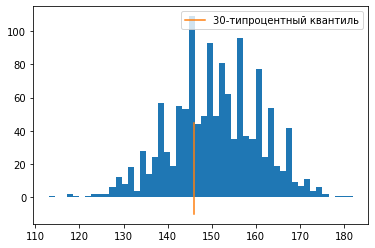

In [263]:
plt.hist(kol_korobok, 50)
plt.plot([146, 146], [-10, 45])
plt.legend(['30-типроцентный квантиль'])
plt.show()

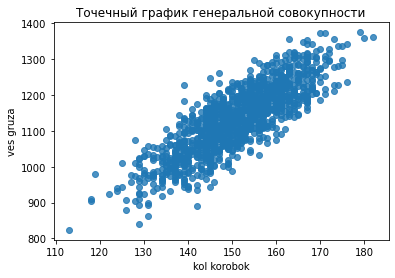

In [286]:
ves_gruza = df['ves gruza']
kol_korobok = df['kol korobok']
sns.regplot(x= kol_korobok, y=ves_gruza,data=df, fit_reg=False)
plt.xlabel('kol korobok')
plt.ylabel('ves gruza')
plt.title('Точечный график генеральной совокупности')
plt.show()

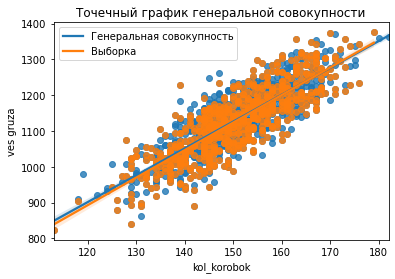

In [290]:
ves_gruza_small = df[df['day']<=15]['ves gruza']
kol_korobok_small = df[df['day']<=15]['kol korobok']
sns.regplot(x= kol_korobok, y=ves_gruza,data=df, fit_reg=True)
sns.regplot(x= kol_korobok_small, y=ves_gruza_small,data=df, fit_reg=True)
plt.xlabel('kol_korobok')
plt.ylabel('ves gruza')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график генеральной совокупности')
plt.show()

По графику можно заметить,что выборка презентативна.

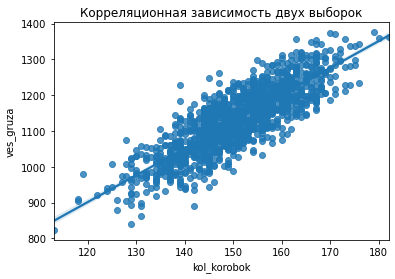

Коэффициент Пирсона = 0.8325170657126875


In [301]:
ves_gruza = df['ves gruza']
kol_korobok = df['kol korobok']
sns.regplot(x = kol_korobok, y = ves_gruza, data=df, fit_reg=True)
plt.xlabel('kol_korobok')
plt.ylabel('ves_gruza')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()
corr = kol_korobok.corr(ves_gruza)
print('Коэффициент Пирсона =', corr)

Коэффицент приблизительно = 1, значит линейная связь между двумя величинами высокая 

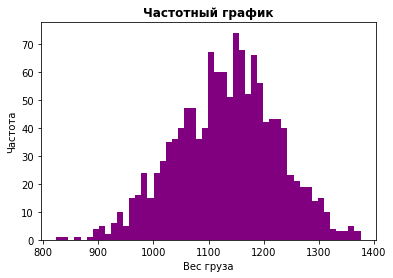

In [295]:
plt.hist(df['ves gruza'], 50, facecolor='purple')
plt.title('Частотный график',fontweight="bold")
plt.xlabel('Вес груза')
plt.ylabel('Частота')
plt.show()

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


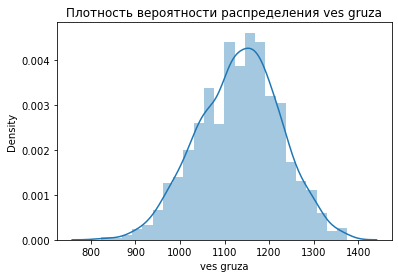

In [297]:
ves_gruza = df['ves gruza']
sns.distplot(ves_gruza)
plt.title('Плотность вероятности распределения ves gruza')
plt.show()

По графику можно сказать, что распределение близко к нормальному, но всё таки вроде является распределнием Стьюдента

### Тест Шапиро-Вилка

Проверяет, является ли выборка нормальной.

*  Гипотеза H0 - образец имеет нормальное гауссово распределение
*  гипотеза H1 - образец не имеет нормальное распределение

In [313]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(df['ves gruza'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('имеет нормальное гауссово распределение')
else:
    print('не имеет нормальное гауссово распределение')

stat=0.997, p=0.025
не имеет нормальное гауссово распределение


Итак, мои сомнения подтвердились

### Корреляционный тест

До этого я вычисляла коэффициент корреляции Пирсона и выявила, что зависимость сущетвует, проверим это:

* H0: два образца независимы
* H1: существует зависимость между образцами.

In [315]:
from scipy.stats import pearsonr
r, p = pearsonr(kol_korobok, ves_gruza)
print(r, p)
if p > 0.05:
    print('независимы')
else:
    print('существует зависимость между величинами')

0.8325170657126876 0.0
существует зависимость между величинами


Действительно, зависимость существует

Разделим данные 'ves gruza' на 2 части 1051.23> и <1051.23 и проверим гипотезу
* H0: Автомобиль грузоподъемностью 1.2 тонны сможет перевезти 140 коробок(со средним весом 1051,23)

In [322]:
small_1 = df[df['ves gruza'] >= 1000]['kol korobok']
small_2 = df[df['ves gruza'] < 1051.23]['kol korobok']

print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=23.01965027316285, pvalue=3.5521414472942923e-100)


Принимаем данную гипотезу, автомобиль сможет перевести 140 коробок